In [2]:
import numpy as np
import scipy
import scipy.special
euler_mascheroni = 0.57721566490153286060651209008240243104215933593992

In [16]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [73]:
def Eqlogp(mu_q,beta_q,mu_p,beta_p):
    # qlogp
   return -(mu_q-mu_p+euler_mascheroni*beta_q)/beta_p - np.log(beta_p) - np.exp(-(mu_q-mu_p)/beta_p)*scipy.special.gamma(beta_q/beta_p+1.)
    
def sample(mu,beta,size=1):
    u = np.random.uniform(size=size)
    return mu - beta*np.log(-np.log(u))

def kl(mu_q,mu_p):
    return -1 + mu_q-mu_p + np.exp(-(mu_q-mu_p))

In [50]:
def logp(x,mu,beta):
    return -((x-mu)/beta + np.exp(-(x-mu)/beta)) - np.log(beta)

In [74]:
mu_q = 1.
beta_q = 1.
mu_p = -0.5
beta_p = 1.

qlogq = Eqlogp(mu_q,beta_q,mu_q,beta_q)
qlogp = Eqlogp(mu_q,beta_q,mu_p,beta_p)
KL = kl(mu_q,mu_p)

sample_q = sample(mu_q,beta_q,size=10000000)
qlogp_numerical = logp(sample_q,mu_p,beta_p).mean()

In [75]:
qlogq

-1.5772156649015328

In [76]:
-euler_mascheroni - np.log(beta_q) - 1

-1.5772156649015328

In [77]:
qlogp

-2.3003458250499627

In [78]:
qlogp_numerical

-2.3000623290805566

In [79]:
qlogq - qlogp

0.7231301601484299

In [80]:
KL

0.72313016014842979

In [44]:
mu_p = np.random.randn(10000)
beta_p = np.random.randn(10000)**2.+1
qlogp = Eqlogp(mu_q,beta_q,mu_p,beta_p)
kl = qlogq-qlogp

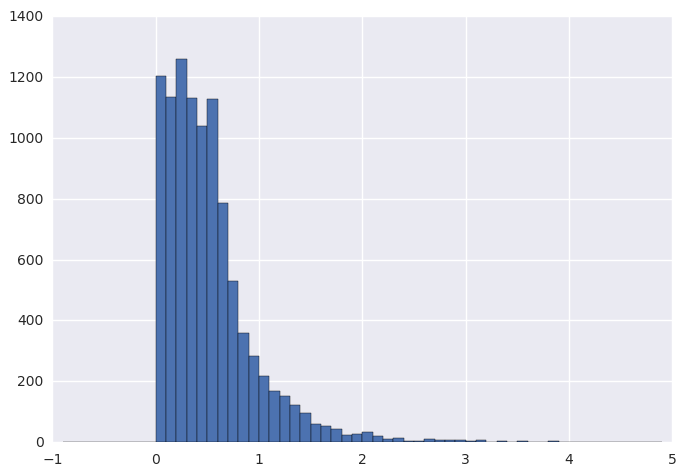

In [45]:
_ = plt.hist(kl,bins = np.arange(-1,5,0.1))

In [47]:
kl.min(),kl.max()

(1.7689933625497645e-05, 14.010009586913515)